#### Importing the necessary libraries 

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

import matplotlib.pyplot as plt 


In [21]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [22]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])


In [23]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [24]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


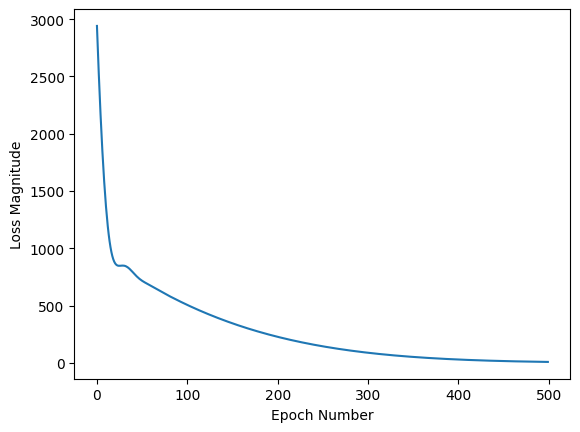

In [25]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [26]:
print(model.predict([100]))

1/1 [==============================] - 0s 63ms/step
[[211.3229]]


Ok, now then write a linear regression problem for "How does advertising spending affect revenue for a business by generation some synthetic data that simulates the relationship between advertising spending and sales revenue for a business".

Problem Statement:
A company wants to understand how its advertising spending impacts its sales revenue. They collect data on advertising expenditures (in dollars) and corresponding sales revenue (in thousands of dollars) for a set of months. The goal is to build a linear regression model that predicts sales revenue based on advertising spending.

spending_on_advertising (X): The amount spent on advertising during a specific month (in dollars).
sales_revenue(Y): The total sales revenue generated during the same month (in thousands of dollars).

Task:
Build a linear regression model to predict sales revenue based on advertising spending.
Calculate the regression coefficients (slope and intercept).
Evaluate the model’s performance using appropriate metrics (e.g., mean squared error, R-squared).

Questions:
What is the estimated relationship between advertising spending and sales revenue?
How much additional sales revenue can be expected for every $100 increase in advertising spending?

In [27]:
#Generate synthetic data
''' 
I created a dataset with 300 observations.
The advertising spending values were randomly generated between 0 and 1000 in dollars.
The sales revenue was calculated using the formula: Revenue = 100 + 0.5 × spending_on_advertising     + ε, 
where ε represents random noise with a normal distribution (mean = 0, standard deviation = 50).
'''
np.random.seed(123) ## assign seed number to get the exact random values whenever we run

no_of_observation=300
spending_on_advertising=np.random.uniform(0,1000,no_of_observation)
sales_revenue= 100 + 0.5*spending_on_advertising +np.random.normal(0,50,no_of_observation)

In [28]:
#Create DataFrame
advert_to_revenue=pd.DataFrame({"Advertising_cost":spending_on_advertising,
                                "Revenue":sales_revenue})
advert_to_revenue

,Advertising_cost,Revenue
0,696.469186,470.028381
1,286.139335,227.121818
2,226.851454,244.950128
3,551.314769,268.032712
4,719.468970,386.478674
...,...,...
295,940.029015,601.611922
296,832.716197,460.606101
297,846.054838,450.493262
298,123.923010,138.334975


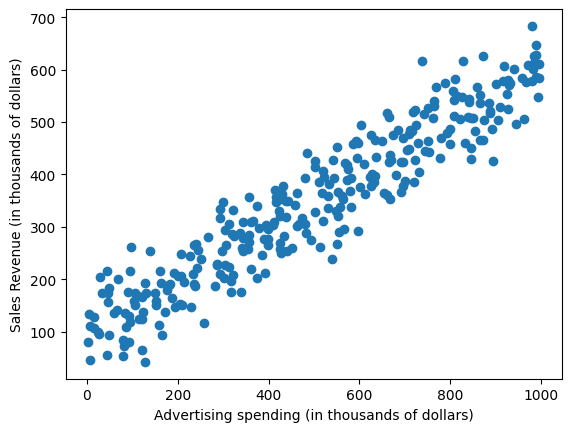

In [29]:
#Plot the graph of relationship between spending on advertistments to sales revenue
plt.scatter(spending_on_advertising,sales_revenue)
plt.xlabel("Advertising spending (in thousands of dollars)")
plt.ylabel("Sales Revenue (in thousands of dollars)")
plt.show()